### Hate Speech Detection on **Snapchat**

**1. Problem Statement**

The goal of this project is to detect hate speech in text data. Hate speech is defined as any communication that belittles a person or a group based on some characteristic such as race, color, ethnicity, gender, sexual orientation, nationality, religion, or other characteristics.



--Develop a model to detect hate speech in Snapchat messages.

**2. Solution Description**



Steps Involved:

**Data Collection:**

Collect text data from Snapchat including both hate speech and non-hate speech content.

**Data Preprocessing:**

-Clean the data:

-Remove special characters and numbers

-Convert text to lowercase

-Remove stop words

**Feature Extraction:**

Convert text data into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency).

**Model Development**

Develop a deep learning model (CNN) to detect hate speech.

**Model Training**

Train and fine-tune the CNN model using the processed data.

**3. Dataset Description**
The dataset contains text data along with labels indicating whether the text is hate speech or not. The dataset format includes:

Overview:

Contains user comments collected from different platforms, with labels indicating whether the comment is hateful or not.

Consists of three columns.

-Platform: The platform from which the comment was collected.

-Comment: The text of the user comment.

-Hateful: Label indicating whether the
comment is hateful (1) or not (0).

In [3]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
import nltk
from nltk.corpus import stopwords
import string
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

**4. Data Visualization**
a. Train, Test, and Validation Data Size

In [7]:
# Download Stopwords
nltk.download('stopwords')
#Load the Dataset
file_path = '/content/HateSpeechDetection (1).csv'
df = pd.read_csv(file_path)


# Data Preprocessing function
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text


# Apply the preprocessing function to the comments
df['Comment'] = df['Comment'].apply(preprocess_text)
print("Data preprocessing completed.")
print(df.head())
X = df['Comment']
y = df['Hateful']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)

max_length = 100
X_padded = pad_sequences(X_tokenized, maxlen=max_length, padding='post')
print("Tokenization and padding completed.")
#print(X_padded[:5])

desired_samples_per_class = 5000
sampling_strategy = {0: desired_samples_per_class, 1: desired_samples_per_class}

ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_padded, y)
#print("Dataset balanced using RandomOverSampler.")
#print("Class distribution after resampling:")
#print(pd.Series(y_resampled).value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Data preprocessing completed.
  Platform                                           Comment  Hateful
0   Reddit              damn thought strict gun laws germany        0
1   Reddit  dont care stands anything connected like shields        0
2   Reddit                                    group idea lol        0
3   Reddit                                           america        0
4   Reddit  dog spectacular dancer considering two left feet        0
Tokenization and padding completed.
Data split into training and testing sets.
Training set size: 8000, Testing set size: 2000


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 2400)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (5000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 2400)
  warnings.warn(


b. Label-wise Split in Train Data:

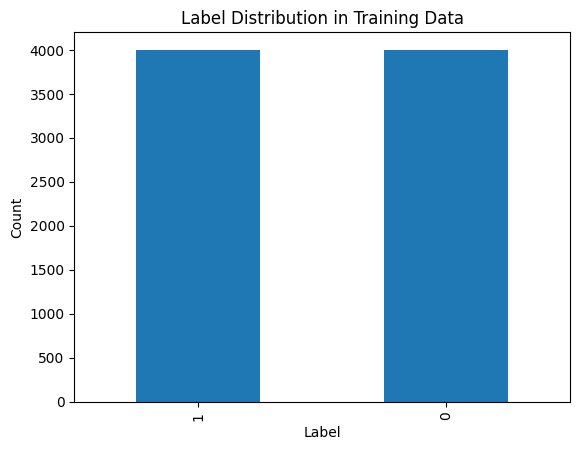

In [9]:
import matplotlib.pyplot as plt

# Plot the label distribution in the training set
pd.Series(y_train).value_counts().plot(kind='bar')
plt.title('Label Distribution in Training Data')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

**5. Data Preprocessing Steps**

In [26]:
# Data Preprocessing
def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Comment'] = df['Comment'].apply(preprocess_text)
print("Data preprocessing completed.")

X = df['Comment']
y = df['Hateful']

# Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_tokenized = tokenizer.texts_to_sequences(X)

max_length = 100
X_padded = pad_sequences(X_tokenized, maxlen=max_length, padding='post')
print("Tokenization and padding completed.")

# Resampling
desired_samples_per_class = 5000
sampling_strategy = {0: desired_samples_per_class, 1: desired_samples_per_class}

ros = RandomOverSampler(sampling_strategy=sampling_strategy, random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_padded, y)
print("Dataset balanced using RandomOverSampler.")
print("Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")
print(f"Training set size: {len(X_train)}, Testing set size: {len(X_test)}")


Data preprocessing completed.
Tokenization and padding completed.
Dataset balanced using RandomOverSampler.
Class distribution after resampling:
Hateful
0    5000
1    5000
Name: count, dtype: int64
Data split into training and testing sets.
Training set size: 8000, Testing set size: 2000


/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (5000) in class 0 will be larger than the number of samples in the majority class (class #0 -> 2400)
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/imblearn/utils/_validation.py:313: UserWarning: After over-sampling, the number of samples (5000) in class 1 will be larger than the number of samples in the majority class (class #0 -> 2400)
  warnings.warn(


**6. Model Training and Evaluation**
a. Train a CNN Model

In [33]:

embedding_dim = 64  # Embedding dimension
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=embedding_dim, input_length=max_length))
cnn_model.add(Conv1D(filters=16, kernel_size=5, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
cnn_model.add(Dropout(0.8))
cnn_model.add(Dense(1, activation='sigmoid'))
print("Model defined successfully.")
cnn_model.summary()

optimizer = Adam(learning_rate=0.0001)
cnn_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)

cnn_history = cnn_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=1, callbacks=[early_stopping])
print("Model training completed.")


Model defined successfully.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 64)           396352    
                                                                 
 conv1d_7 (Conv1D)           (None, 96, 16)            5136      
                                                                 
 max_pooling1d_5 (MaxPoolin  (None, 48, 16)            0         
 g1D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 768)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                49216     
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                          

b. Evaluate the Model

63/63 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.9615
Test Accuracy: 0.9614999890327454
63/63 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1001
           1       0.98      0.95      0.96       999

    accuracy                           0.96      2000
   macro avg       0.96      0.96      0.96      2000
weighted avg       0.96      0.96      0.96      2000



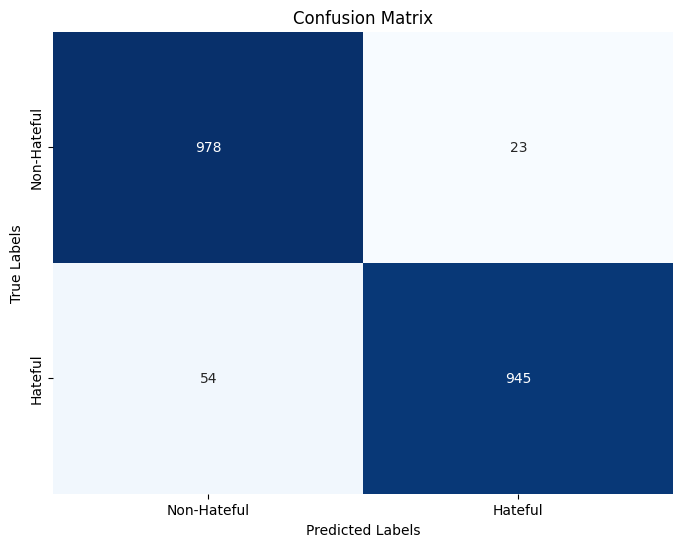

In [34]:

cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test Accuracy: {cnn_accuracy}')


y_pred = (cnn_model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Hateful', 'Hateful'], yticklabels=['Non-Hateful', 'Hateful'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**7. Code to Predict Hate Speech on New Samples**

In [35]:
# Function to preprocess user input
def preprocess_user_input(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text_tokenized = tokenizer.texts_to_sequences([text])
    text_padded = pad_sequences(text_tokenized, maxlen=max_length, padding='post')
    return text_padded

# Function to predict hate speech
def predict_hate_speech(text):
    processed_text = preprocess_user_input(text)
    prediction = (cnn_model.predict(processed_text) > 0.5).astype("int32")
    return "Hateful" if prediction[0][0] == 1 else "Non-Hateful"

# Sample inputs
texts = [
    "I hope you have a great day!",  # Non-hateful
    "Your presentation was really impressive!",  # Non-hateful
    "Shut up, nobody cares about your stupid opinions!",  # Hateful
    "You're a complete waste of space!",  # Hateful
]

# Predict and print results
for text in texts:
    result = predict_hate_speech(text)
    print(f"Text: {text}\nPrediction: {result}\n")

1/1 [==============================] - 0s 23ms/step
Text: I hope you have a great day!
Prediction: Non-Hateful

1/1 [==============================] - 0s 27ms/step
Text: Your presentation was really impressive!
Prediction: Non-Hateful

1/1 [==============================] - 0s 23ms/step
Text: Shut up, nobody cares about your stupid opinions!
Prediction: Hateful

1/1 [==============================] - 0s 24ms/step
Text: You're a complete waste of space!
Prediction: Non-Hateful

